# Introducing large language models

In [4]:
from transformers import pipeline
text_classifier = pipeline (task="text-classification",
model="nlptown/bert-base-multilingual-uncased-sentiment")
text = "Dear seller, I got very impressed with the fast delivery and careful packaging"
sentiment= text_classifier(text)
print(sentiment)

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrat

[{'label': '5 stars', 'score': 0.7578072547912598}]


In [ ]:

import torch import torch.nn as nn
d_model = 512
n_heads = 8
num_encoder_layers = 6 num_decoder_layers = 6
model = nn. Transformer(
d_model=d_model,
nhead=n_heads,
num_encoder_layers-num_encoder_layers, 
num_decoder_layers=num_decoder_layers
)

In [ ]:

class PositionalEncoder (nn. Module):
    def __init__(self, d_model, max_seq_length=512): 
        super (PositionalEncoder, self).__init__()
        self.d_model = d_model
        self.max_seq_length = max_seq_length
        pe = torch.zeros(max_seq_length, d_model) 
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze (1)
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float) * -(math.log(10000.0) / d_model))
        pe[:, 0::2]=torch.sin(position * div_term) 
        pe[:, 1:2]=torch.cos (position * div_term) 
        pe=pe.unsqueeze (0)
        self.register_buffer('pe', pe)
        # register_buffer makes pe a persistent tensor that is not a parameter (i.e., it won't be updated during backpropagation). This ensures the positional encodings remain fixed during training.
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

In [ ]:

import torch.nn as nn
import torch.nn.functional as F
class MultiHeadAttention (nn.Module):
    def __init__(self, d_model, num_heads):
        super (MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.head_dim= d_model // num_heads
        self.query_linear = nn. Linear (d_model, d_model) 
        self.key_linear = nn. Linear(d_model, d_model) 
        self.value_linear = nn. Linear (d_model, d_model)
        
    def split_heads (self, x, batch_size):
        x = x.view(batch_size, -1, self.num_heads, self.head_dim) 
        return x. permute(0, 2, 1, 3).contiguous().
        view(batch_size * self.num_heads, -1, self.head_dim)
    def compute_attention (self, query, key, mask=None): 
        scores = torch.matmul (query, key.permute(1, 2, 0)) 
        if mask is not None:
            scores = scores.masked_fill (mask ==0, float("-1e9"))
        attention_weights = F.softmax(scores, dim=-1) 
        return attention_weights
            

In [ ]:

def forward(self, query, key, value, mask=None):
    batch_size = query.size(0)
    query= self.split_heads (self.query_linear (query), batch_size) 
    key = self.split_heads (self.key_linear (key), batch_size) 
    value = self.split_heads (self.value_linear (value), batch_size)
    attention_weights = self.compute_attention (query, key, mask)
    output = torch.matmul (attention_weights, value)
    output = output.view(batch_size, self.num_heads, -1, self.head_dim).permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.d_model) 
    return self.output_linear(output)

In [ ]:

class FeedForwardSubLayer (nn.Module):
    def __init__(self, d_model, d_ff):
        super (FeedForwardSubLayer, self).__init__()
        self.fc1 = nn. Linear (d_model, d_ff) 
        self.fc2 = nn. Linear(d_ff, d_model) 
        self.relu = nn. ReLU()
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

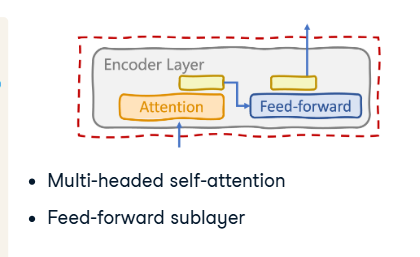

In [ ]:

class EncoderLayer (nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super (EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention (d_model, num_heads)
        self.feed_forward = FeedForwardSubLayer (d_model, d_ff) 
        self.norm1 = nn. Layer Norm (d_model)
        self.norm2 = nn. LayerNorm (d_model)
        self.dropout = nn. Dropout (dropout)
    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask) 
        x = self.norm1(x + self.dropout(attn_output)) 
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output)) 
        return x

In [ ]:

class TransformerEncoder (nn.Module):
    def __init__(self, vocab_size, d_model, num_layers,
    num_heads, d_ff, dropout, max_sequence_length): 
        super (TransformerEncoder, self).__init__() 
        self.embedding = nn. Embedding (vocab_size, d_model)
        self.positional_encoding =
        PositionalEncoding (d_model, max_sequence_length) 
        self.layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
    def forward(self, x, mask):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer (x, mask)
        return x

In [ ]:

class ClassifierHead(nn. Module):
    def __init__(self, d_model, num_classes): 
        super(ClassifierHead, self).__init__() 
        self.fc= nn.Linear (d_model, num_classes)
    def forward(self, x):
        logits= self.fc(x)
        return F.log_softmax(logits, dim=-1)

In [ ]:

class RegressionHead (nn. Module):
    def __init__(self, d_model, output_dim): 
        super (RegressionHead, self).__init__() 
        self.fc=nn.Linear (d_model, output_dim)
    def forward(self, x): 
        return self.fc(x)

In [7]:

class DecoderOnlyTransformer (nn.Module):
    def __init__(self, vocab_size, d_model, num_layers, num_heads, d_ff, dropout, max_sequence_length): 
        super(TransformerDecoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_sequence_length)
        self.layers = nn.ModuleList([Decoder Layer (d_model, num_heads, d_ff, dropout) for in range(num_layers)]) 
        self.fc = nn.Linear(d_model, vocab_size)
        
    def forward(self, x, self_mask):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = Layer(x, self_mask)
        x = self.fc(x)
        return F.log_softmax(x, dim=-1)

SyntaxError: invalid syntax (1208855122.py, line 6)

In [ ]:
input_sequence = torch.randint(0, vocab_size, (batch_size, sequence_length))

# Create a triangular attention mask for causal attention
self_attention_mask = (1 - torch.triu(torch.ones(1, sequence_length, sequence_length), diagonal=1)).bool()


# Instantiate the decoder transformer
decoder = DecoderOnlyTransformer(vocab_size, d_model, num_layers, num_heads, d_ff, dropout, max_sequence_length=sequence_length)

output = decoder(input_sequence, self_attention_mask)
print(output.shape)
print(output)

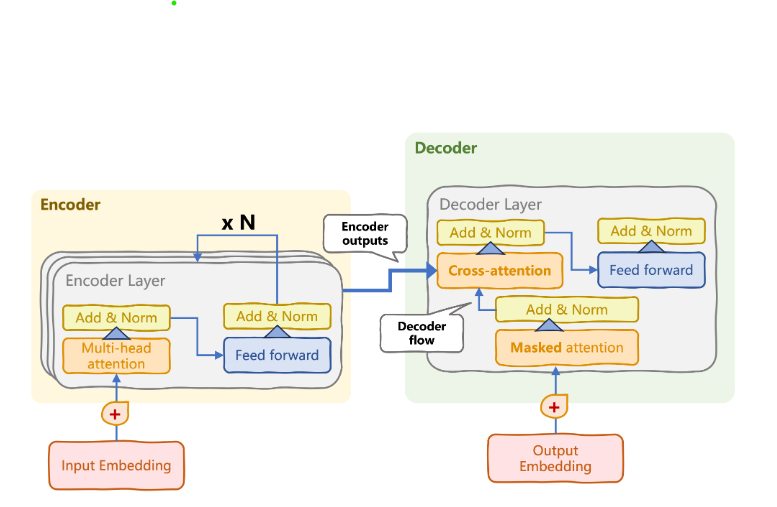

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        
        # Initialize the causal (masked) self-attention and cross-attention
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = FeedForwardSubLayer(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, causal_mask, encoder_output, cross_mask):
        # Pass the necessary arguments to the causal self-attention and cross-attention
        self_attn_output = self.self_attn(x, x, x,causal_mask)
        x = self.norm1(x + self.dropout(self_attn_output))
        cross_attn_output = self.cross_attn(x, encoder_output, encoder_output, cross_mask)
        x = self.norm2(x + self.dropout(cross_attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

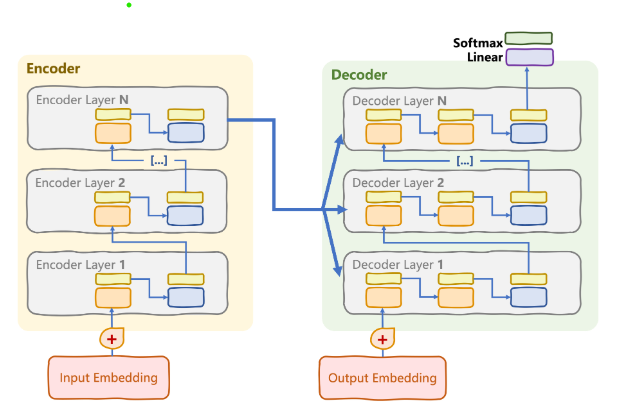

In [ ]:

class Transformer (nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_len, dropout):
        super(Transformer, self).__init__()
        self.encoder = TransformerEncoder(vocab_size, d_model, num_heads, num_layers, num_heads, d_ff, max_seq_len, dropout)
        self.decoder = TransformerDecoder(vocab_size, d_model, num_heads, num_layers, num_heads, d_ff, max_seq_len, dropout)
    def forward(self, src, src_mask, causal_mask): 
        encoder_output = self.encoder(src, src_mask) 
        decoder_output = self.decoder(src, encoder_output, causal_mask, mask)
        return decoder_output

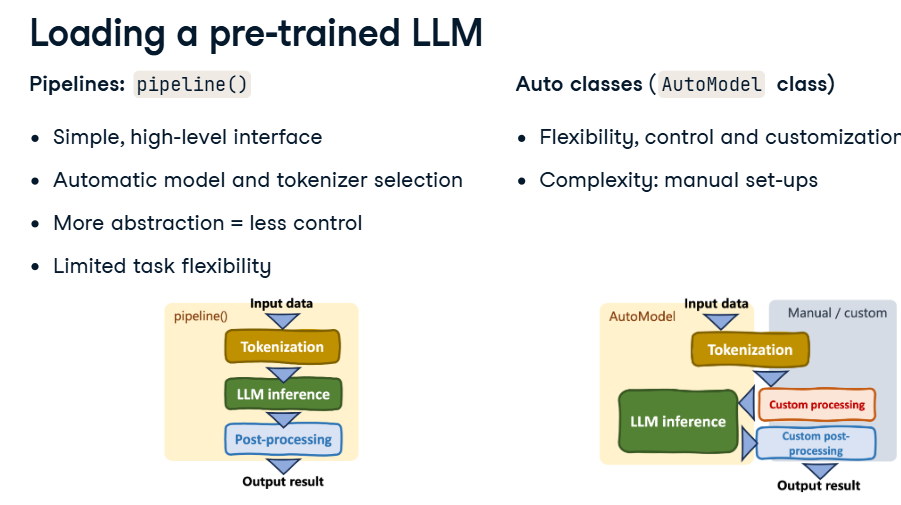

In [12]:
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained (model_name) 
model = AutoModel.from_pretrained (model_name)
text = "I am an example sequence for text classification."
class SimpleClassifier (nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)
    def forward(self, x):
        return self.fc(x)

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import torch
inputs=tokenizer(text, return_tensors="pt", padding=True,truncation=True, max_length=64)
outputs = model (**inputs)
pooled_output = outputs.pooler_output
print("Hidden states size: ", outputs.last_hidden_state.shape) 
print("Pooled output size: ", pooled_output.shape)
classifier_head = SimpleClassifier( pooled_output.size(-1), num_classes=2) 
logits = classifier_head (pooled_output) 
probs =torch.softmax (logits, dim=1) 
print("Predicted Class Probabilities:", probs)

Hidden states size:  torch.Size([1, 11, 768])
Pooled output size:  torch.Size([1, 768])
Predicted Class Probabilities: tensor([[0.5001, 0.4999]], grad_fn=<SoftmaxBackward0>)


## Mode with Classifcation Head

In [20]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer 
model_name = "nlptown/bert-base-multilingual-uncased-sentiment" 
tokenizer = AutoTokenizer.from_pretrained (model_name)
model = AutoModelForSequenceClassification.from_pretrained( model_name)
text = "The quality of the product was just okay." 
inputs = tokenizer (text, return_tensors="pt")
outputs = model (**inputs)
logits = outputs.logits
predicted_class=torch.argmax(logits, dim=1).item()
print(f"Predicted class index: {predicted_class + 1} star.")

Predicted class index: 3 star.


In [26]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained (model_name) 
model = AutoModelForCausalLM.from_pretrained (model_name)
prompt = "This is a simple example for text generation,"
inputs =tokenizer.encode(prompt, return_tensors="pt")
output= model.generate (inputs, max_length=26)

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your in

In [28]:
output

tensor([[1212,  318,  257, 2829, 1672,  329, 2420, 5270,   11,  475,  340,  338,
          635,  257,  922,  835,  284,  651,  257, 1254,  329,  703,  262, 2420,
          318, 7560]])

In [30]:

generated_text=tokenizer.decode(
output[0], skip_special_tokens=True)
print("Generated Text: ")
print(generated_text)

Generated Text: 
This is a simple example for text generation, but it's also a good way to get a feel for how the text is generated


In [36]:

from datasets import load_dataset 
from torch.utils.data import DataLoader
dataset = load_dataset("imdb")
train_data = dataset["train"]
dataloader = DataLoader (train_data, batch_size=2, shuffle=True)
for batch in dataloader:
    for i in range(len(batch ["text"])):
        print(f"Example {i + 1}:") 
        print("Text: ", batch["text"][i]) 
        print("Label: ", batch ["label"][i])

Generating unsupervised split: 100%|██████████████████████████████████| 50000/50000 [00:00<00:00, 105093.43 examples/s]


Example 1:
Text:  This independent, B&W, DV feature consistently shocks, amazes and amuses with it's ability to create the most insane situations and then find humor and interest in them. It's all hilarious and ridiculous stuff, yet as absurd as much of the film should be, there is a heart and a reality here that keeps the film grounded, keeps the entire piece from drifting into complete craziness and therein lies the real message here. This film is about how we all survive in a world gone mad. That seems to be the heart of the film. For as insane and off the wall as things get, Leon, the 30 yr. old paperboy-protagonist, always tries to keep it together. He's like a child forever trying to catch the balloon that is floating away so that everything will work out for the best, so that everyone can have what they want.<br /><br />The acting in the film could have went far over the top but the exceptional cast really keeps the piece cohesive. Van Meter is perhaps the best of the bunch here

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



tensor(0)
Example 2:
Text:  I think that the shots and lighting were very poor. When I watched it for the first time I thought it was the old version(1956). When I really found out the true year of the film I was shocked. I didn't know that there could be such a bad film made so recently. Thats really all I wanted to say. This film had a good plot though, nothing you couldn't miss out on if you would simply read the novel that George Orwelll wrote. All I really want to say has already been said except for this: I can't believe that this film could have possibly received so many awards and nominations.I gave this film a One (awful), because I felt that it was very badly made. Well that is all. So long
Label:  tensor(0)
Example 1:
Text:  Dreck about three beautiful women in California who go to cover some festival (or something). All the hotels are booked so they have to spend the night in a creepy old house. What they don't know is that there is a creepy inhabitant there who likes to ki

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



tensor(1)
Example 1:
Text:  Wow. Saw this last night and I'm still reeling from how good it was. Every character felt so real (although most of them petty, selfish a**holes) and the bizarre story - middle aged widow starts shagging her daughter's feckless boyfriend - felt utterly convincing. Top performances all round but hats off to Anne Reid and Our Friends in the North's Daniel Craig (the latter coming across as the next David Thewlis).<br /><br />And director Roger Michell? This is as far from Notting Hill as it's possible to be. Thank God.<br /><br />Watch this movie!!!
Label:  tensor(1)
Example 2:
Text:  Made after QUARTET was, TRIO continued the quality of the earlier film versions of the short stories by Maugham. Here the three stories are THE VERGER, MR. KNOW-IT-ALL, and SANITORIUM. The first two are comic (THE VERGER is like a prolonged joke, but one with a good pay-off), and the last more serious (as health issues are involved). Again the author introduces the film and the s

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



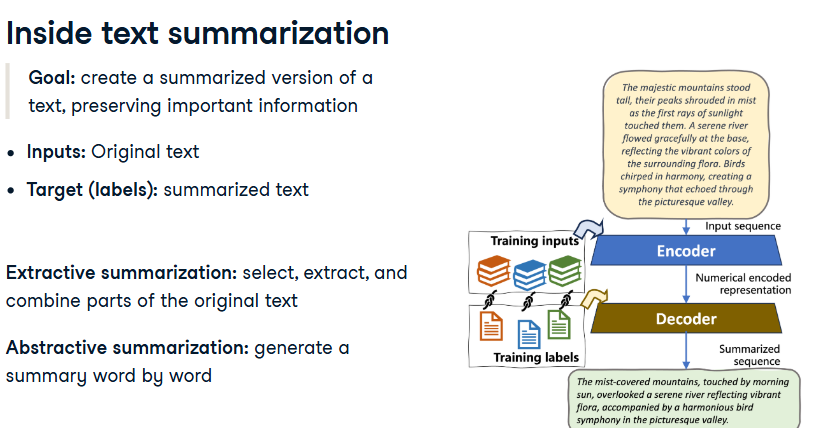

In [49]:

from datasets import load_dataset

dataset = load_dataset("ILSUM/ILSUM-1.0", "English") 

print(f"Features: {dataset['train'].column_names}")

example = dataset["train"][21]
example['Article']

Generating train split: 0 examples [00:00, ? examples/s]C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\datasets\download\streaming_download_manager.py:778: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)
Generating train split: 12565 examples [00:01, 11164.65 examples/s]
Generating test split: 0 examples [00:00, ? examples/s]C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\datasets\download\streaming_download_manager.py:778: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)
Generating test split: 4487 examples [00:00, 11753.58 examples/s]
Generating validation split: 0 examples [00:00, ? examples/s]C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\datasets\downlo

Features: ['id', 'Article', 'Heading', 'Summary']


'This is how an Apple Watch saved a man\'s life after detecting accidentIt all started when Gabe Burdett was waiting for his father Bob at their pre-designated location for some mountain biking at the Riverside State Park when he received a text alert from his dad\'s Apple Watch, saying it had detected a "hard fall".Burdett, from city of Spokane in Washington State later received another update from the Watch, saying his father had reached Sacred Heart Medical Center."We drove straight there but he was gone when we arrived. I get another update from the Watch saying his location has changed with a map location of SHMC. Dad flipped his bike at the bottom of Doomsday, hit his head and was knocked out until sometime during the ambulance ride," Burdett wrote in a Facebook post.The Watch notified 911 with the location and within 30 minutes, emergency medical services (EMS) took the injured Bob to the hospital."If you own an Apple Watch, set up your hard fall detection, it\'s not just for wh

In [55]:

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained (model_name) 
model = AutoModelForSeq2SeqLM.from_pretrained (model_name)
input_ids = tokenizer.encode(
"summarize: " + example["Article"],
return_tensors="pt", max_length=512, truncation=True)

summary_ids = model.generate(input_ids, max_length=150) 
summary = tokenizer.decode(
summary_ids[0], skip_special_tokens=True)
print("Original Text: ")
print(example["Article"])
print("\nGenerated Summary:")
print( tokenizer.decode(
summary_ids[0], skip_special_tokens=True))

Original Text: 
This is how an Apple Watch saved a man's life after detecting accidentIt all started when Gabe Burdett was waiting for his father Bob at their pre-designated location for some mountain biking at the Riverside State Park when he received a text alert from his dad's Apple Watch, saying it had detected a "hard fall".Burdett, from city of Spokane in Washington State later received another update from the Watch, saying his father had reached Sacred Heart Medical Center."We drove straight there but he was gone when we arrived. I get another update from the Watch saying his location has changed with a map location of SHMC. Dad flipped his bike at the bottom of Doomsday, hit his head and was knocked out until sometime during the ambulance ride," Burdett wrote in a Facebook post.The Watch notified 911 with the location and within 30 minutes, emergency medical services (EMS) took the injured Bob to the hospital."If you own an Apple Watch, set up your hard fall detection, it's not

In [57]:

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model_name = "Helsinki-NLP/opus-mt-en-cy"
tokenizer = AutoTokenizer.from_pretrained (model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
input_seq="2 Regulations under section 1: supplementary" 
input_ids = tokenizer.encode(input_seq, return_tensors="pt") 
translated_ids = model.generate(input_ids)
translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
print("Predicted (Welsh):", translated_text)

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-cy. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\transformers\models\marian\tokenization_marian.py:

Predicted (Welsh): 2 Rheloiad o dan adran 1:aryary" means "i


In [69]:

from transformers import AutoTokenizer
model_ckp = "deepset/minilm-uncased-squad2"
tokenizer =AutoTokenizer.from_pretrained (model_ckp)
question = "How is the taste of wasabi?"
context = "Japanese cuisine captures the essence of a harmonious fusion between fresh ingredients and traditional culinary techniques, all heightened by the zesty taste of the aromatic green condiment known as wasabi."
inputs=tokenizer (question, context,
return_tensors="pt")

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--deepset--minilm-uncased-squad2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [73]:
from transformers import AutoModelForQuestionAnswering
model = AutoModelForQuestionAnswering.from_pretrained (model_ckp)
with torch.no_grad():
    outputs = model (**inputs)
    start_idx= torch.argmax(outputs.start_logits) 
    end_idx= torch.argmax(outputs.end_logits)
    answer_span= inputs["input_ids"][0][start_idx:end_idx]
    answer = tokenizer.decode (answer_span)

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [75]:

Long_exmp = tokenizer (example_qt, example_ct,return_overflowing_tokens=True,
max_length=100, stride=25)
for idx, window in enumerate (long_exmp["input_ids"]): 
    print("Tokens in window ", idx, ":", len(window))

NameError: name 'example_qt' is not defined

# LLM fine-tuning and transfer learning

In [5]:
import torch
from transformers import AutoModelForSequenceClassification,AutoTokenizer
from datasets import load_dataset

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained (model_name) 
model = AutoModelForSequenceClassification.from_pretrained( model_name, num_labels=2)
def tokenize_function(examples):
    return tokenizer(
    examples["text"], padding="max_length", truncation=True)
    
data = load_dataset("imdb")
tokenized_data = data.map(tokenize_function, batched=True)

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate d

In [82]:
pip install transformers[torch]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [92]:
pip install accelerate>=0.26.0'

Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
output_dir="./smaller_bert_finetuned",
per_device_train_batch_size=8,
num_train_epochs=3,
evaluation_strategy="steps",
eval_steps=500,
save_steps=500,
logging_dir="./logs")

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets ["train"],
                  eval_dataset=tokenized_datasets["test"],
)

trainer.train()

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


NameError: name 'tokenized_datasets' is not defined

In [ ]:
example_input = tokenizer("I am absolutely amazed with this new and revolutionary AI device",
return_tensors="pt")
output= model (**example_input)
predicted_label = torch.argmax (output.logits, dim=1).item()
print("Predicted Label: ", predicted_label)

In [11]:

from transformers import pipeline
from sklearn.metrics import accuracy_score
sentiment_analysis = pipeline("sentiment-analysis")
test_examples = [

{"text": "I love this product!", "label": 1}, {"text": "The service was terrible.", "label": 0},
{"text": "This movie is amazing.", "label": 1},
{"text": "I'm disappointed with the quality.", "label": 0},]
predictions = sentiment_analysis(
[example["text"] for example in test_examples]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate De

In [13]:

true_labels = [example["label"] for example in test_examples] 
predicted_labels = [1 if pred["label"] == "POSITIVE" else 0 for pred in predictions]
accuracy = accuracy_score (true_labels, predicted_labels)
# Print results
print("Test Examples:")
for example, pred_label in zip (test_examples, predicted_labels):
    print(f"Text: {example['text']}, Prediction: {pred_label}")
print(f"Accuracy: {accuracy:.2%}")

Test Examples:
Text: I love this product!, Prediction: 1
Text: The service was terrible., Prediction: 0
Text: This movie is amazing., Prediction: 1
Text: I'm disappointed with the quality., Prediction: 0
Accuracy: 100.00%


In [23]:
pip install evaluate

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


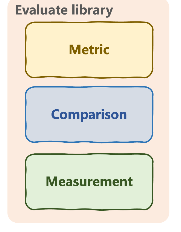

In [27]:
import evaluate 
accuracy = evaluate.load('accuracy')
print(accuracy.description)
print(accuracy.features) 
print(evaluate.load('f1').description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative

{'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}



The F1 score is the harmonic mean of the precision and recall. It can be computed with the equation:
F1 = 2 * (precision * recall) / (precision + recall)



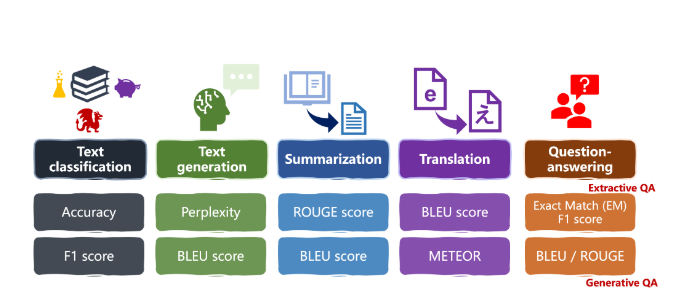

In [29]:
# Load the metrics
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

# Print descriptions of the metrics
print("Accuracy:", accuracy.description)
print("Precision:", precision.description)
print("Recall:", recall.description)
print("F1 Score:", f1.description)

Accuracy: 
Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative

Precision: 
Precision is the fraction of correctly labeled positive examples out of all of the examples that were labeled as positive. It is computed via the equation:
Precision = TP / (TP + FP)
where TP is the True positives (i.e. the examples correctly labeled as positive) and FP is the False positive examples (i.e. the examples incorrectly labeled as positive).

Recall: 
Recall is the fraction of the positive examples that were correctly labeled by the model as positive. It can be computed with the equation:
Recall = TP / (TP + FN)
Where TP is the true positives and FN is the false negatives.

F1 Score: 
The F1 score is the harmonic mean of the precision and recall. It can be computed with the equation:
F1 = 2 * (precision * recall)

In [53]:
# PERPEXILITY
model_name = "gpt2"
#... Load model and tokenizer
prompt = "Latest research findings in Antarctica show"
# Encode the prompt, generate text and decode it
prompt_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(prompt_ids, max_length=20)
generated_text = tokenizer.decode(
  output[0], skip_special_tokens=True)

print("Generated Text: ", generated_text)

# Load and compute the perplexity score
perplexity = evaluate.load("perplexity", module_type="metric")
results = perplexity.compute(model_id='gpt2',                        predictions=generated_text)
print("Perplexity: ", results['mean_perplexity'])

TypeError: The current model class (DistilBertForSequenceClassification) is not compatible with `.generate()`, as it doesn't have a language model head. Classes that support generation often end in one of these names: ['ForCausalLM', 'ForConditionalGeneration', 'ForSpeechSeq2Seq', 'ForVision2Seq'].

In [ ]:
# Measure overlap between similarities
rouge = evaluate.load("rouge")
predictions=["""as we learn more about the frequency and size distribution of exoplanets, we are discovering that terrestrial planets are exceedingly common."""] 
references = ["""The more we learn about the frequency and
size distribution of exoplantes, the more confident we are that they are exceedingly common."""]
results = rouge.compute (predictions=predictions,references=references)
print(results)

In [39]:
 # bleu SCORE - Measure translation quality of LLM and human reference
import evaluate
from transformers import pipeline

bleu = evaluate.load("bleu")
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")
input = "Qué hermoso dia"
references = [["What a gorgeous day",
"What a beautiful day"]]
translated_outputs = translator(input)
translated_sentence = translated_outputs[0]['translation_text']
print("Translation: ", translated_sentence)
results = bleu.compute(
predictions=[translated_sentence], references=references)
print(results)


C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\farih\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-es-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\transformers\models\marian\tokenization_marian.py:

Translation:  What a beautiful day.
{'bleu': 0.668740304976422, 'precisions': [0.8, 0.75, 0.6666666666666666, 0.5], 'brevity_penalty': 1.0, 'length_ratio': 1.25, 'translation_length': 5, 'reference_length': 4}


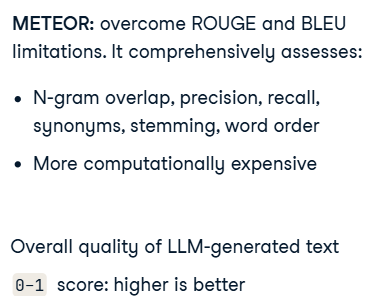

In [46]:

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")
pred = ["He thought it right and necessary to become a knight-errant, roaming the world in armor, seeking adventures and practicing the deeds he had read about in chivalric tales."]
ref = ["He believed it was proper and essential to transform into a knight-errant, traveling the world in armor, pursuing adventures, and enacting the heroic deeds he had encountered in tales of chivalry."]
results_b = bleu.compute(predictions=pred, references=ref) 
results_m = meteor.compute(predictions=pred, references=ref) 
print("Bleu: ", results_b['bleu']) 
print("Meteor: ",results_m['meteor'])

Bleu:  0.19088841781992524
Meteor:  0.5350702240481536


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\farih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\farih\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


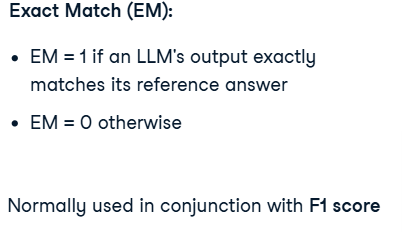

In [51]:
 
from evaluate import load 
em_metric = load("exact_match")
exact_match = evaluate.load("exact_match")
predictions = [
    "The cat sat on the mat.", "Theaters are great.","It's like comparing oranges and apples."]
references = ["The cat sat on the mat?", "Theaters are great.",
"It's like comparing apples and oranges."]
results = exact_match.compute(
references-references, predictions-predictions)
print(results)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [59]:
pip install trl

  Using cached datasets-3.1.0-py3-none-any.whl.metadata (20 kB)
Using cached datasets-3.1.0-py3-none-any.whl (480 kB)
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ------- -------------------------------- 4.7/25.3 MB 22.0 MB/s eta 0:00:01
   --------------- ------------------------ 10.0/25.3 MB 23.9 MB/s eta 0:00:01
   --------------------------- ------------ 17.3/25.3 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------  25.2/25.3 MB 30.6 MB/s eta 0:00:01
   ---------------------------------------- 25.3/25.3 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 11.0.0
    Uninstalling pyarrow-11.0.0:
      Successfully uninstalled pyarrow-11.0.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.16.1
    Uninstalling datasets-2.16.1:
      Successfully uninstalled datasets-2.16.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [66]:
from trl import PPOTrainer, PPOConfig, create_reference_model, AutoModelForCausalLMWithValueHead
from trl.core import respond_to_batch
# TRL : Lib to train llms using RL approaches
model = AutoModelForCausalLMWithValueHead.from_pretrained('gpt2') # has a value head for RL
model_ref = create_reference_model(model)
tokenizer = AutoTokenizer.from_pretrained('gpt2')
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
prompt = "My plan today is to "
input = tokenizer.encode(prompt, return_tensors="pt") 
response = respond_to_batch (model, input)
ppo_config = PPOConfig(batch_size=1, mini_batch_size=1,output_dir='outputs')
ppo_trainer = PPOTrainer (ppo_config, model, model_ref, tokenizer) 
reward = [torch.tensor(1.0)]
train_stats = ppo_trainer.step([input[0]], [response[0]], reward)

TypeError: __init__() missing 2 required positional arguments: 'reward_model' and 'train_dataset'

In [ ]:
# Calculate the individual toxicities, maximum toxicities, and toxicity ratios
toxicity_1 = toxicity_metric.compute(predictions=emp_1)
toxicity_2 = toxicity_metric.compute(predictions=emp_2)
print("Toxicities (emp. 1):", toxicity_1['toxicity'])
print("Toxicities (emp. 2): ", toxicity_2['toxicity'])

toxicity_1_max = toxicity_metric.compute(predictions=emp_1, aggregation="maximum")
toxicity_2_max = toxicity_metric.compute(predictions=emp_2, aggregation="maximum")
print("Maximum toxicity (emp. 1):", toxicity_1_max['max_toxicity'])
print("Maximum toxicity (emp. 2): ", toxicity_2_max['max_toxicity'])

toxicity_1_ratio = toxicity_metric.compute(predictions=emp_1, aggregation="ratio")
toxicity_2_ratio = toxicity_metric.compute(predictions=emp_2, aggregation="ratio")
print("Toxicity ratio (emp. 1):", toxicity_1_ratio['toxicity_ratio'])
print("Toxicity ratio (emp. 2): ", toxicity_2_ratio['toxicity_ratio'])